In [1]:
import pandas as pd
df = pd.read_csv("Data/titanic.csv")
df.head()

,survived,sex,age,sibsp,parch,fare,adult_male,alone,pclass_1,pclass_2,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embarked_C,embarked_Q,embarked_S
0,0,1,22.0,1,0,7.2500,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,38.0,1,0,71.2833,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,1,35.0,0,0,8.0500,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [2]:
df.columns

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'pclass_1', 'pclass_2', 'pclass_3', 'deck_A', 'deck_B',
       'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'embarked_C',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [3]:
cols = df.columns[1:]
x = df[cols]
y = df['survived']
y.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [5]:
from imblearn.under_sampling import RandomUnderSampler
x_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(x,y)
x_samp = pd.DataFrame(data=x_sample, columns = cols)
y_samp = pd.DataFrame(data=y_sample, columns = ['survived'])
df_samp = pd.concat([x_samp, y_samp], axis = 1)

x = x_samp[cols]
y = y_samp['survived']

In [6]:
from sklearn.model_selection import train_test_split

x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.2,stratify=y, random_state=0)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_tr)
x_tr_scaled = ss.transform(x_tr)
x_ts_scaled = ss.transform(x_ts)


In [10]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state = 0)
logit.fit(x_tr_scaled, y_tr)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf.fit(x_tr_scaled, y_tr)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_tr_scaled, y_tr)

from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(random_state=0, max_iter = 1000)
ann.fit(x_tr_scaled, y_tr)

from sklearn.svm import SVC
svm = SVC(random_state = 0)
svm.fit(x_tr_scaled, y_tr)

print(logit.score(x_ts_scaled, y_ts))
print(rf.score(x_ts_scaled, y_ts))
print(knn.score(x_ts_scaled, y_ts))
print(ann.score(x_ts_scaled, y_ts))
print(svm.score(x_ts_scaled, y_ts))

0.8394160583941606
0.8175182481751825
0.8029197080291971
0.7956204379562044
0.8394160583941606


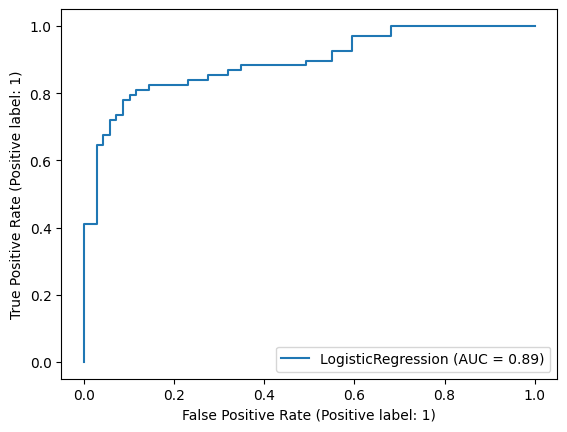

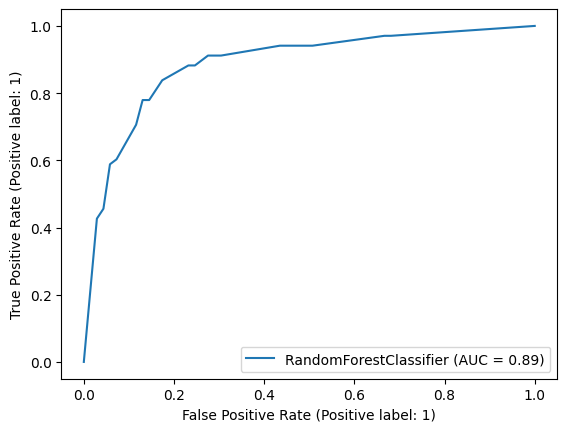

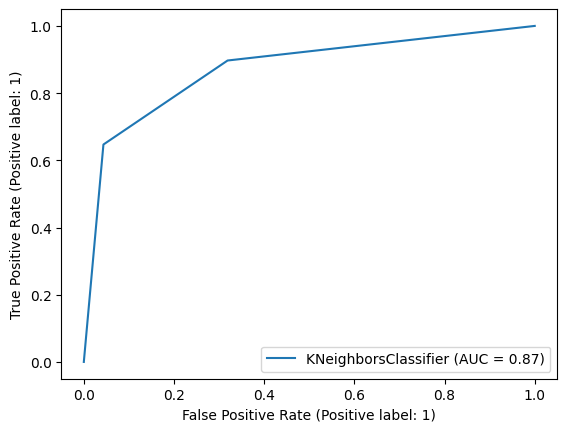

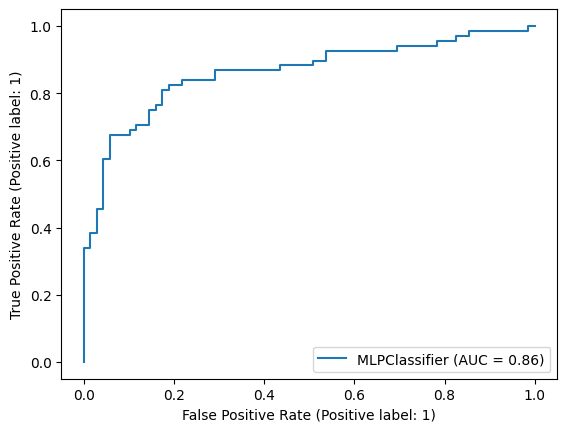

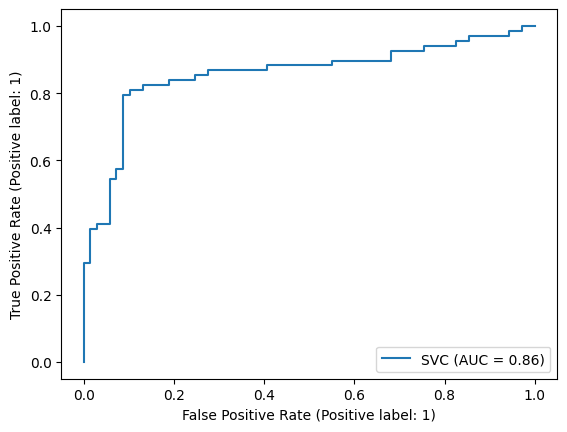

In [11]:
from sklearn.metrics import RocCurveDisplay  
# 내장함수 이용

RocCurveDisplay.from_estimator(logit, x_ts_scaled, y_ts)
RocCurveDisplay.from_estimator(rf, x_ts_scaled, y_ts)
RocCurveDisplay.from_estimator(knn, x_ts_scaled, y_ts)
RocCurveDisplay.from_estimator(ann, x_ts_scaled, y_ts)
RocCurveDisplay.from_estimator(svm, x_ts_scaled, y_ts)

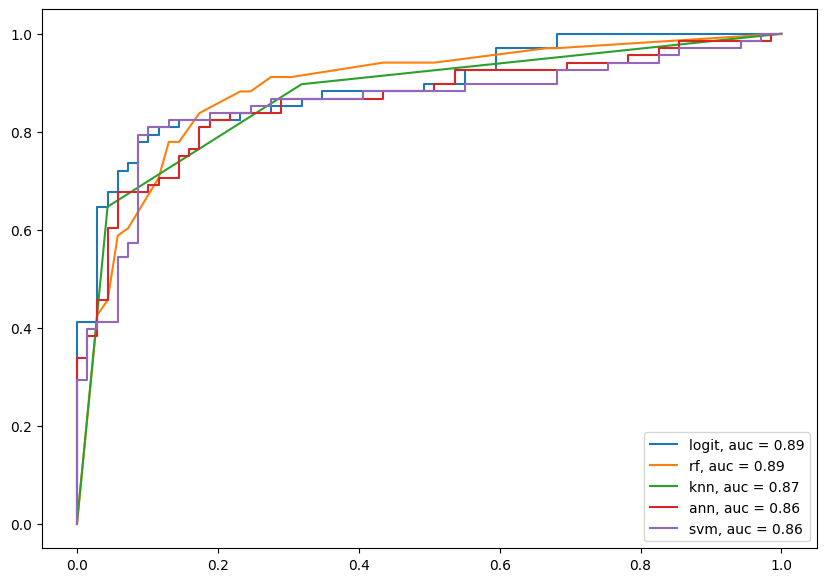

In [12]:
### 분류할 때는 score, classification report, roc커브(auc) 이용해 평가

from sklearn import metrics
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))

pred = logit.decision_function(x_ts_scaled)    
pred_proba = logit.predict_proba(x_ts_scaled)[::,1]
# decision_function 판별함수. scaling된 변수(학습한데이터의 형태)를 넣는 것이 중요
# 0이 기준, 양수면 1, 음수면 0

fpr, tpr, thresh = metrics.roc_curve(y_ts.values, pred)
auc = metrics.roc_auc_score(y_ts, pred)
# ROC커브, 1x1 그래프, auc는 아래 면적. 
plt.plot(fpr, tpr, label = 'logit, auc =' +str(f"{auc: .2f}"))


pred_proba = rf.predict_proba(x_ts_scaled)[::,1]
fpr, tpr, thresh = metrics.roc_curve(y_ts, pred_proba)
auc = metrics.roc_auc_score(y_ts, pred_proba)
plt.plot(fpr, tpr, label = 'rf, auc =' +str(f"{auc: .2f}"))


pred_proba = knn.predict_proba(x_ts_scaled)[::,1]
fpr, tpr, thresh = metrics.roc_curve(y_ts, pred_proba)
auc = metrics.roc_auc_score(y_ts, pred_proba)
plt.plot(fpr, tpr, label = 'knn, auc =' +str(f"{auc: .2f}"))


pred_proba = ann.predict_proba(x_ts_scaled)[::,1]
fpr, tpr, thresh = metrics.roc_curve(y_ts, pred_proba)
auc = metrics.roc_auc_score(y_ts, pred_proba)
plt.plot(fpr, tpr, label = 'ann, auc =' +str(f"{auc: .2f}"))



pred = svm.decision_function(x_ts_scaled)
fpr, tpr, thresh = metrics.roc_curve(y_ts, pred)
auc = metrics.roc_auc_score(y_ts, pred)
plt.plot(fpr, tpr, label = 'svm, auc =' +str(f"{auc: .2f}"))


plt.legend()
plt.show()